In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/DAV sem 6/da6a51a8-7d1c-4572-9314-e29a7bdc3fb3_Data.csv")
print(df.head(5))

                                         Series Name     Series Code  \
0  Births attended by skilled health staff (% of ...  SH.STA.BRTC.ZS   
1  Births attended by skilled health staff (% of ...  SH.STA.BRTC.ZS   
2  Births attended by skilled health staff (% of ...  SH.STA.BRTC.ZS   
3  Births attended by skilled health staff (% of ...  SH.STA.BRTC.ZS   
4  Births attended by skilled health staff (% of ...  SH.STA.BRTC.ZS   

                  Country Name Country Code 2012 [YR2012] 2013 [YR2013]  \
0                  Afghanistan          AFG          39.9            ..   
1  Africa Eastern and Southern          AFE            ..            ..   
2   Africa Western and Central          AFW            ..            ..   
3                      Albania          ALB            ..            ..   
4                      Algeria          DZA            ..          96.6   

  2014 [YR2014] 2015 [YR2015] 2016 [YR2016] 2017 [YR2017] 2018 [YR2018]  \
0          45.2          50.5            

In [ ]:
df.set_index("Country Name", inplace=True)
print(df.head(5))

                                                                   Series Name  \
Country Name                                                                     
Afghanistan                  Births attended by skilled health staff (% of ...   
Africa Eastern and Southern  Births attended by skilled health staff (% of ...   
Africa Western and Central   Births attended by skilled health staff (% of ...   
Albania                      Births attended by skilled health staff (% of ...   
Algeria                      Births attended by skilled health staff (% of ...   

                                Series Code Country Code 2012 [YR2012]  \
Country Name                                                             
Afghanistan                  SH.STA.BRTC.ZS          AFG          39.9   
Africa Eastern and Southern  SH.STA.BRTC.ZS          AFE            ..   
Africa Western and Central   SH.STA.BRTC.ZS          AFW            ..   
Albania                      SH.STA.BRTC.ZS          AL

In [ ]:
import os

In [ ]:
df.replace({"Births attended by skilled health staff (% of total)": "Births",
             "Current health expenditure (% of GDP)": "Health"}, inplace=True)

In [ ]:
df.drop(columns=["Series Code", "Country Code"], inplace=True)

In [ ]:
print(df.head(5))

                            Series Name 2012 [YR2012] 2013 [YR2013]  \
Country Name                                                          
Afghanistan                      Births          39.9            ..   
Africa Eastern and Southern      Births            ..            ..   
Africa Western and Central       Births            ..            ..   
Albania                          Births            ..            ..   
Algeria                          Births            ..          96.6   

                            2014 [YR2014] 2015 [YR2015] 2016 [YR2016]  \
Country Name                                                            
Afghanistan                          45.2          50.5            ..   
Africa Eastern and Southern            ..            ..            ..   
Africa Western and Central             ..            ..            ..   
Albania                                ..            ..            ..   
Algeria                                ..            ..         

In [ ]:

# Pivot the DataFrame
df_pivot = df.pivot(columns="Series Name")


# Create multi-level column index
df_pivot.columns = pd.MultiIndex.from_tuples([(col[1], col[0].split()[0]) for col in df_pivot.columns])


# Display the first few rows of the pivoted DataFrame with multi-level column index
df_pivot


,Births,Health,Births,Health,Births,Health,Births,Health,Births,Health,Births,Health,Births,Health,Births,Health,Births,Health,Births,Health
,2012,2012,2013,2013,2014,2014,2015,2015,2016,2016,2017,2017,2018,2018,2019,2019,2020,2020,2021,2021
Country Name,,,,,,,,,,,,,,,,,,,,
Afghanistan,39.9,7.89716864,..,8.80596447,45.2,9.52887821,50.5,10.10534763,..,11.81859016,53.4,12.62081718,58.8,14.20841891,..,14.8313194,61.8,15.53361392,..,16.82606226
Africa Eastern and Southern,..,6.15246595409235,..,6.20676639621933,..,5.84442821971323,..,6.13765851070291,..,6.05368098677759,..,5.95094960674184,..,5.81668423008718,69.4114299453955,5.80106686012428,..,5.86295435330642,..,..
Africa Western and Central,..,3.49743654970278,..,3.61331551713385,..,3.59535123437358,..,3.81980504383655,..,3.80638734102677,..,3.78006150459256,..,3.39354958133446,55.8282412083194,3.34485760556784,..,3.83483317961402,..,..
Albania,..,6.09262609,..,6.27234411,..,6.44164276,..,6.48361206,..,6.66606188,..,6.54604626,99.8,6.65958786,..,..,..,..,..,..
Algeria,..,6.00050974,96.6,6.03576279,..,6.54721403,..,6.97849178,..,6.60749817,..,6.27938414,..,6.16302586,98.8,6.25170851,..,6.32117987,..,..
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,..,..,..,..,99.6,..,..,..,..,..,..,..,..,..,..,..,99.7,..,..,..
World,..,9.35857405623131,..,9.32880556598518,..,9.42773291467739,..,9.72643148879525,..,9.85011608900089,..,9.75098963246082,..,9.67679048758379,82.5578165464599,9.82984760891454,..,10.8867063927396,..,..


In [ ]:
import numpy as np

In [ ]:
# Replace ".." values with NaN
df_pivot.replace("..", np.nan, inplace=True)

# Convert columns to numeric (if required)
for column in df_pivot.columns:
    df_pivot[column] = pd.to_numeric(df_pivot[column], errors='ignore')

# Calculate the average of each column
column_averages = df_pivot.mean(numeric_only=True)

# Fill NaN values with the corresponding average value of each column
df_pivot.fillna(column_averages, inplace=True)

# Save the updated DataFrame to the same CSV file
df_pivot.to_csv("/content/updated_data.csv")

# Print a message to confirm the file has been updated
print("Values replaced and data types updated. The file has been updated.")
print(df_pivot.columns)


Values replaced and data types updated. The file has been updated.
MultiIndex([('Births', '2012'),
            ('Health', '2012'),
            ('Births', '2013'),
            ('Health', '2013'),
            ('Births', '2014'),
            ('Health', '2014'),
            ('Births', '2015'),
            ('Health', '2015'),
            ('Births', '2016'),
            ('Health', '2016'),
            ('Births', '2017'),
            ('Health', '2017'),
            ('Births', '2018'),
            ('Health', '2018'),
            ('Births', '2019'),
            ('Health', '2019'),
            ('Births', '2020'),
            ('Health', '2020'),
            ('Births', '2021'),
            ('Health', '2021')],
           )


In [ ]:
# print(df.head(5))
print(df_pivot.head(5))

                                Births    Health     Births    Health  \
                                  2012      2012       2013      2013   
Country Name                                                            
Afghanistan                  39.900000  7.897169  91.753869  8.805964   
Africa Eastern and Southern  91.605236  6.152466  91.753869  6.206766   
Africa Western and Central   91.605236  3.497437  91.753869  3.613316   
Albania                      91.605236  6.092626  91.753869  6.272344   
Algeria                      91.605236  6.000510  96.600000  6.035763   

                                Births    Health     Births     Health  \
                                  2014      2014       2015       2015   
Country Name                                                             
Afghanistan                  45.200000  9.528878  50.500000  10.105348   
Africa Eastern and Southern  92.139612  5.844428  93.310107   6.137659   
Africa Western and Central   92.139612  3.595

In [ ]:
df_pivot.loc["India", ("Births","2019")]

90.44689481406408

In [ ]:
df = df_pivot

In [ ]:
# Extract the "Health" column for the year 2016
health_2016 = df[('Health', '2016')]

# Find the country with maximum health expenditure (% of GDP) in 2016
max_country = health_2016.idxmax()

# Find the country with minimum health expenditure (% of GDP) in 2016
min_country = health_2016.idxmin()

# Print the results
print("Country with maximum health expenditure (% of GDP) in 2016:", max_country)
print("Country with minimum health expenditure (% of GDP) in 2016:", min_country)


Country with maximum health expenditure (% of GDP) in 2016: United States
Country with minimum health expenditure (% of GDP) in 2016: Monaco


In [ ]:
# Calculate the average "Births attended by skilled health staff" in 2014
average_births_2014 = df[('Births', '2014')].mean()

# Find the "Births attended by skilled health staff" in India in 2014
births_india_2014 = df.loc['India', ('Births', '2014')]

# Print the results
print("Average 'Births attended by skilled health staff' in 2014:", average_births_2014)
print("'Births attended by skilled health staff' in India in 2014:", births_india_2014)


Average 'Births attended by skilled health staff' in 2014: 92.13961231080872
'Births attended by skilled health staff' in India in 2014: 81.4


In [ ]:
# Extract the values of "Births attended by skilled health staff" for the year 2020
births_2020 = df[('Births', '2020')]

# Get the value of "Births attended by skilled health staff" in India in 2020
india_births_2020 = df.loc['India', ('Births', '2020')]

# Count the number of countries where the value is greater than in India
countries_more_than_india = (births_2020 > india_births_2020).sum()

# Print the result
print("Number of countries where 'Births attended by skilled health staff' in 2020 is more than in India:", countries_more_than_india)


Number of countries where 'Births attended by skilled health staff' in 2020 is more than in India: 34


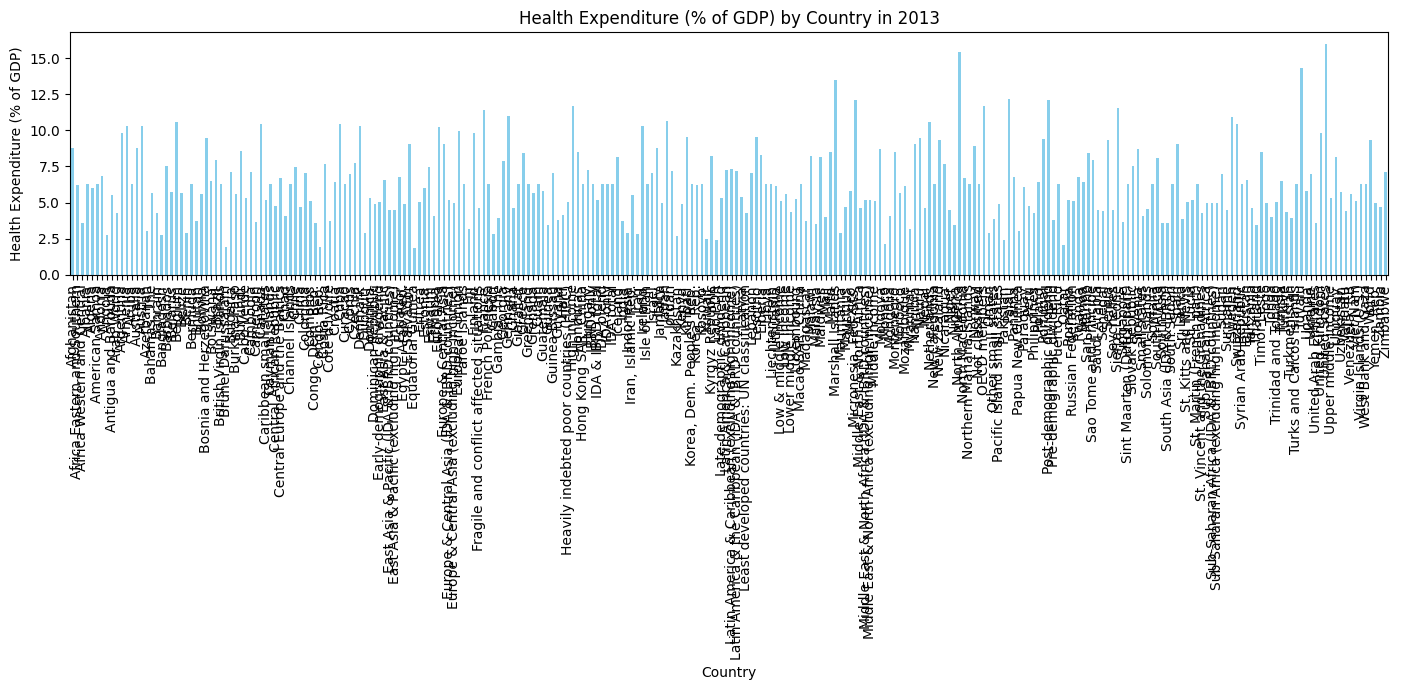

In [ ]:
import matplotlib.pyplot as plt

# Extract "Health expenditure (% of GDP)" for the year 2013
health_expenditure_2013 = df[('Health', '2013')]

# Drop NaN values
health_expenditure_2013 = health_expenditure_2013.dropna()

# Plot bar plot
plt.figure(figsize=(14, 7))
health_expenditure_2013.plot(kind='bar', color='skyblue')
plt.xlabel('Country')
plt.ylabel('Health Expenditure (% of GDP)')
plt.title('Health Expenditure (% of GDP) by Country in 2013')
plt.xticks(rotation=90)
plt.tight_layout()

# Save the plot as a JPG image
plt.savefig('health_expenditure_2013_by_country.jpg')

# Show the plot
plt.show()






In [ ]:
# Sort the DataFrame based on "Health expenditure (% of GDP)" for the year 2020 in descending order
sorted_df = df[('Health', '2020')].sort_values(ascending=False)

# Extract the names of the top five countries
top_five_countries = sorted_df.head(5)

# Print the result
print("Five countries with the highest Health expenditure (% of GDP) in 2020:")
print(top_five_countries)


Five countries with the highest Health expenditure (% of GDP) in 2020:
Country Name
Tuvalu           21.539169
United States    18.815826
Palau            18.390642
North America    18.389479
Afghanistan      15.533614
Name: (Health, 2020), dtype: float64


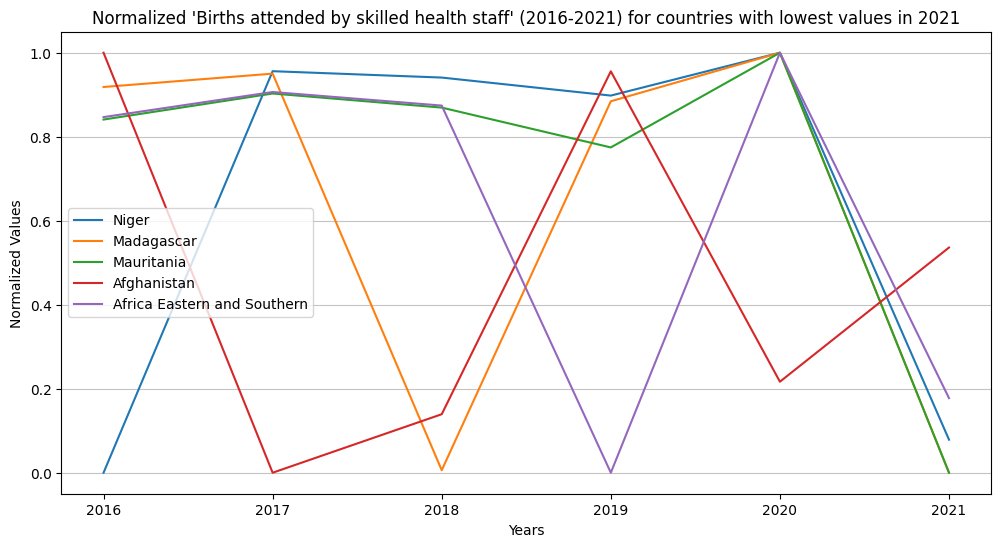

In [ ]:
# Q7 : Which five countries has lowest "Birth attended by skilled health staff" on 2021? Get "Birth attended by skilled health staff" for these five countries from 2016 to 2021. Normalize these data country wise and plot area plot (Years on x axis and normalized values on y axis). Set country names as legend in plot.

import matplotlib.pyplot as plt

# Getting the five countries with the lowest "Births attended by skilled health staff" in 2021
lowest_2021 = df["Births"]["2021"].nsmallest(5)

# Getting the "Births attended by skilled health staff" for these five countries from 2016 to 2021
lowest_2021_countries = lowest_2021.index.tolist()

# Sorting the index to avoid UnsortedIndexError
df_sorted = df.sort_index(axis=1)

lowest_2021_data = df_sorted.loc[lowest_2021_countries, ("Births", slice("2016", "2021"))]

# Normalizing the data country-wise
normalized_data = lowest_2021_data.apply(lambda x: (x - x.min()) / (x.max() - x.min()), axis=1)

# Plotting the area plot
plt.figure(figsize=(12, 6))
for country in lowest_2021_countries:
    years = normalized_data.columns.get_level_values(1).tolist()
    values = normalized_data.loc[country].tolist()
    plt.plot(years, values, label=country)

plt.xlabel("Years")
plt.ylabel("Normalized Values")
plt.title("Normalized 'Births attended by skilled health staff' (2016-2021) for countries with lowest values in 2021")
plt.legend()
plt.grid(axis='y', alpha=0.75)
plt.savefig('normalized_births_area_plot.jpg')
plt.show()
